In [1]:
import sys
sys.path.append('/Users/hnamkung/workspace/sketch_home')
from python_lib.pkl_saver import PklSaver

import os
before_path = '/Users/hnamkung/workspace/sketch_home/sketch_control_plane/SketchMD/result/workload_2/20140320/before'
after_path = '/Users/hnamkung/workspace/sketch_home/sketch_control_plane/SketchMD/result/workload_2/20140320/after'
pcap_dir_list = sorted(os.listdir(before_path))

import statistics


In [38]:
# MRB
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    # print(pcap_dir)
    for inst_name in ["inst3", "inst6"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[0.2068886249568982, 0.8768898006511171, 0.5352122828515822, 0.9994306807955776, 0.1290480093472612, 1.353594509152966, 1.7078102899575671, 0.4583007806492492, 1.0672224141902786, 1.3473674919458052, 1.0837737794884073, 0.004332380209687202, 0.02911155182765961, 0.5573375269316301, 0.3311125470710132, 1.692787052969353, 0.28864584507836283, 3.3350681157201896, 1.4204821575777646, 2.7918205181882563, 1.2090658058494088, 0.39466171053662796, 0.6131529661572964, 0.6001017628924606, 0.3947739041882435, 0.7439969608612209, 0.6709205217228114, 0.5364881098385504, 0.8228270093344647, 0.16387993832574715, 0.2746421615898047, 0.19436553535957624, 0.8180693798221332, 0.6551450267556486, 0.9611432010136924, 1.0952158175953512, 1.9477816105626262, 1.339952402708545, 0.10942095200067571, 1.1559789910834248, 1.1659211950292414, 1.9053606402785503, 1.2703431941103935, 1.743056606397206, 1.9546876136446285, 0.3742538121307723, 1.0414498218650934, 0.8049384058956299, 0.09669156967910239, 0.139633794338

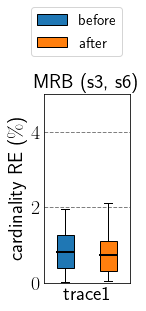

In [39]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

plt.title("MRB (s3, s6)", fontsize = 20)
plt.ylabel("cardinality RE ($\%$)", fontsize = 20)
plt.ylim([0, 5])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(0.5))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("mrb.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [40]:
# Entropy
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    for inst_name in ["inst1", "inst7"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[15.633208473459401, 17.54522072579082, 17.851420231406646, 19.470031737054423, 19.139426002524896, 19.361476507824175, 10.894002273672342, 9.641314278658822, 16.369667230176212, 17.359345010003295, 17.97167748308484, 18.288760276122463, 19.272823469223965, 19.252617400478382, 10.629438071154079, 9.908098618755025, 16.144067655594732, 16.400775390494786, 17.1487685460077, 18.821128667015188, 19.594398226328643, 19.55712523578696, 11.18902886678536, 9.724373929044596, 16.5768967917514, 17.00114549427174, 18.17423796662821, 18.712761103931076, 18.83748417419164, 20.564197593995303, 10.907184369224042, 9.800968805552753, 16.831306214445775, 16.637549499422917, 17.612093178133037, 18.093504546776906, 17.852200400067186, 18.43550345838612, 10.917953699349127, 10.392570126225062, 16.015605677329063, 17.96570619070926, 19.063242172893037, 19.787943119265766, 21.755347563077077, 20.773152746147225, 10.634211344323932, 8.819173784565166, 14.241449175640582, 12.4726787863684, 13.379234125800519,

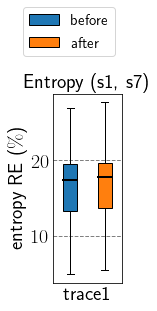

In [41]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

plt.title("Entropy (s1, s7)", fontsize = 20)
plt.ylabel("entropy RE ($\%$)", fontsize = 20)
# plt.ylim([0, 5])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(0.5))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("entropy.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [2]:
# MRAC
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    for inst_name in ["inst4", "inst10"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)
print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[0.5096317462312798, 0.5124939818873622, 0.46294474266097635, 0.46314952074636323, 0.49256936355867487, 0.4751362412949542, 0.49205942171844036, 0.48212968675706375, 0.49477946264265665, 0.4748766071821279, 0.4234428178968139, 0.4902306555788233, 0.5114434179465083, 0.4827677733986425, 0.4559138871559404, 0.46835791740308086, 0.5326444682126767, 0.48586517943912366, 0.47245190009495314, 0.46761515298874506, 0.4955381126120078, 0.4649439918985653, 0.41279496898620893, 0.5035568288047494, 0.5164225403567249, 0.4616497633222486, 0.4311165482982254, 0.5332751060566074, 0.5160692858871522, 0.47236993248685205, 0.4487902719263981, 0.49848737165166174, 0.48003806576632235, 0.45013405684045277, 0.4896730617644552, 0.47015052612586067, 0.5490987117891103, 0.4655739924991852, 0.4527320422821768, 0.48279020033525827]
[0.4806744892338174, 0.45522512602197396, 0.4513301399857303, 0.45130241629889384, 0.4885089507354396, 0.41884167834861297, 0.45336447910768946, 0.41746574969658923, 0.47449912936671

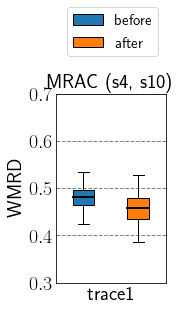

In [3]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2.5, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

plt.title("MRAC (s4, s10)", fontsize = 20)
plt.ylabel("WMRD", fontsize = 20)
plt.ylim([0.3, 0.7])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(0.5))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("mrac.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [44]:
# CS
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    for inst_name in ["inst2"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[0.9260160392571324, 0.6461189787318188, 0.5913671085586486, 0.501178436971372, 0.5479641356755992, 0.8347548285408709, 0.8562296229804397, 0.5928557007318357, 0.8137770080834916, 0.6780948250494305, 0.5349668421228315, 0.48501131169597217, 0.8139864115116481, 0.46175762368095186, 0.6078420647398939, 1.0172032332499439, 0.6361275922186562, 0.7320606848937813, 0.5189389421976071, 0.7243121947492531, 0.8664203836771341, 0.934009795576982, 0.5284429115171811, 1.4685086775626706, 0.754729251843153, 0.7986164038768002, 0.8440531989687274, 0.7158008951814285, 0.839025092478218, 0.7529899435484944, 0.8509878304424356, 0.7476162398966321, 0.6025991343002103, 1.058036652793, 0.5781250529175429, 0.8761275668381294, 0.9377219351611701, 0.990051870109177, 0.6548465832132264, 0.9078079976992695, 0.7278758323765754, 0.7463810888172658, 0.9290702674851273, 0.7581230879533752, 0.6398124217958132, 0.7058815221822491, 0.6748619823037815, 0.7033420302477985, 0.8032704963066917, 0.9382852031097548, 0.6983

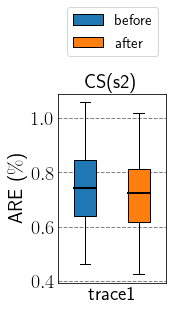

In [45]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2.5, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

# plt.title("CM(inst6) CS(inst7), Kary(inst8)", fontsize = 20)
plt.title("CS(s2)", fontsize = 20)
plt.ylabel("ARE ($\%$)", fontsize = 20)
# plt.ylim([0, 6])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(2))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("CS.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [46]:
# CM
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    for inst_name in ["inst8"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[3.1604129514641386, 3.454695146657391, 4.1642736741674415, 3.517644214909158, 3.480456782812663, 2.9026070232695975, 4.068582049391942, 4.524186734939415, 4.262988279838961, 3.7301414916323643, 4.165298716123588, 3.497216852612652, 3.54585669190329, 3.851425755611473, 4.497746698422906, 4.045726406487396, 3.176425215948175, 3.125618192236504, 4.734575993291807, 3.048421765116253]
[3.043142550170474, 3.615301022959343, 3.9440247952435414, 3.6459998345570357, 3.268797389753446, 3.384277908670431, 4.075422057195535, 2.927406354307398, 4.194632917207978, 3.958495258360656, 4.088226384109483, 3.3284809357266147, 3.4330469668150982, 4.004415926011919, 4.5343555765895855, 3.6819673951151812, 3.226962529376395, 3.35921115748889, 4.582608455703752, 2.536676308541003]
20 3.637999091767827
20 3.630650428758189


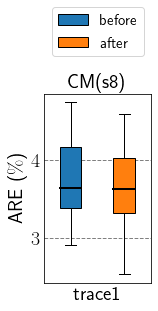

In [47]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2.5, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

# plt.title("CM(inst6) CS(inst7), Kary(inst8)", fontsize = 20)
plt.title("CM(s8)", fontsize = 20)
plt.ylabel("ARE ($\%$)", fontsize = 20)
# plt.ylim([0, 4])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(2))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("CM.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [4]:
# Kary
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    for inst_name in ["inst9"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[6.069713545069736, 5.119778613731137, 7.2983613737442115, 7.960891285172784, 5.5663727980853865, 24.203583443074702, 9.43847296814481, 13.706634099003049, 7.335996582708338, 2.551474407966085]
[1.7568242623388541, 2.776760858689148, 1.4558078971339825, 2.637357508656856, 1.6823737870772284, 2.157617875885081, 2.8187986795173234, 2.6763632327080473, 1.872901235686091, 2.6413942319545614]
10 7.317178978226275
10 2.3974876922709685


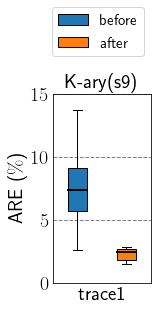

In [5]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2.5, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

# plt.title("CM(inst6) CS(inst7), Kary(inst8)", fontsize = 20)
plt.title("K-ary(s9)", fontsize = 20)
plt.ylabel("ARE ($\%$)", fontsize = 20)
plt.ylim([0, 15])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(2))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("kary.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()
